<a href="https://colab.research.google.com/github/vermanaman419-prog/Amazon_Prime_Video-/blob/main/amazon_prime_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Prime Video Data Cleaning + EDA

**Step** **contains**

* **Importing** **libraries**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **Loading** **dataset**

In [ ]:
df = pd.read_csv("amazon_prime_titles.csv")

* **Basic** **Exploration**

In [ ]:
print("Shape:", df.shape)

Shape: (9668, 12)


In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
None


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
print(df.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

# Data Cleaning

**Step** **contains**

* **Drop** **duplicates**

In [ ]:
df = df.drop_duplicates()

* **Handling** **missing** **values**

In [ ]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")

* Dropping **date_added** column as more than 90% of the values are missing

In [ ]:
df = df.drop(columns=['date_added'])


# Further Analysis using Visualizations

* **Countplot** **of** **type**

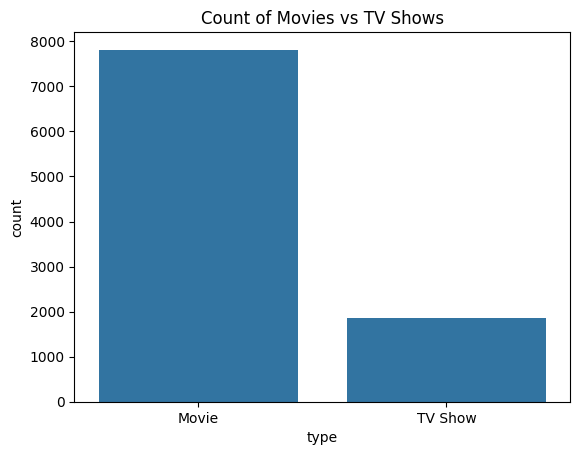

In [ ]:
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.show()

* **Distribution** **of** **release** **year**

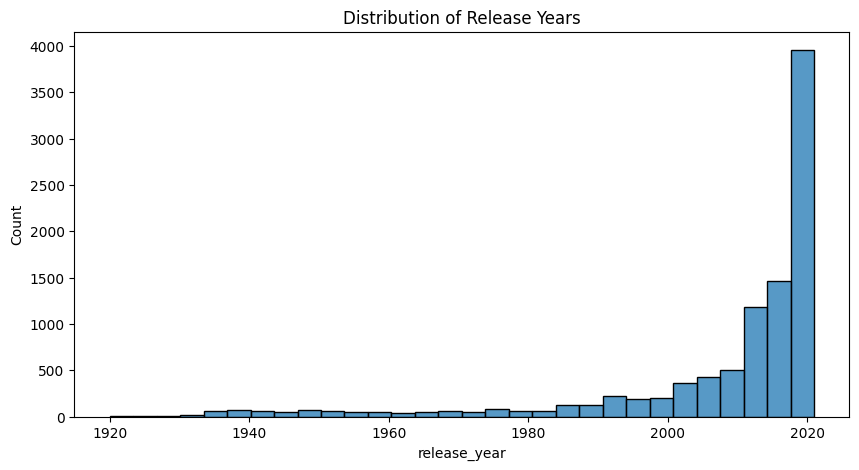

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title("Distribution of Release Years")
plt.show()

* **Top** **ratings**

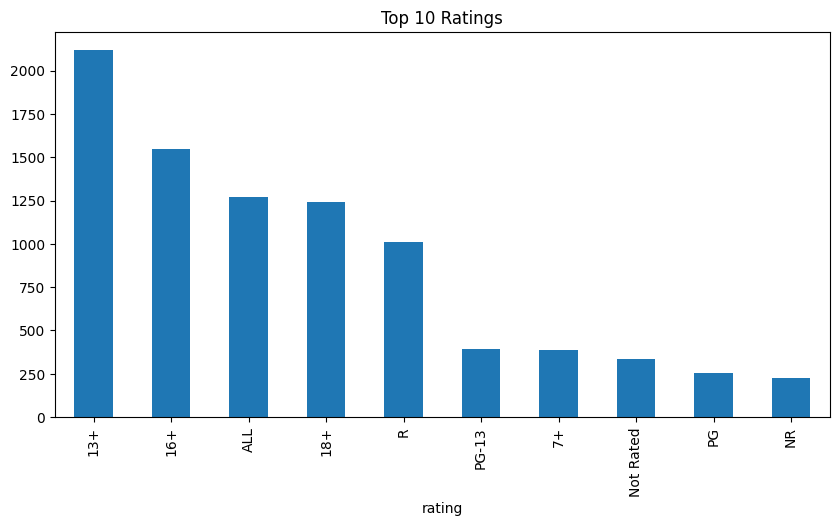

In [ ]:
plt.figure(figsize=(10,5))
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Ratings")
plt.show()

* **Top** **10** **countries** **with** **most** **titles**

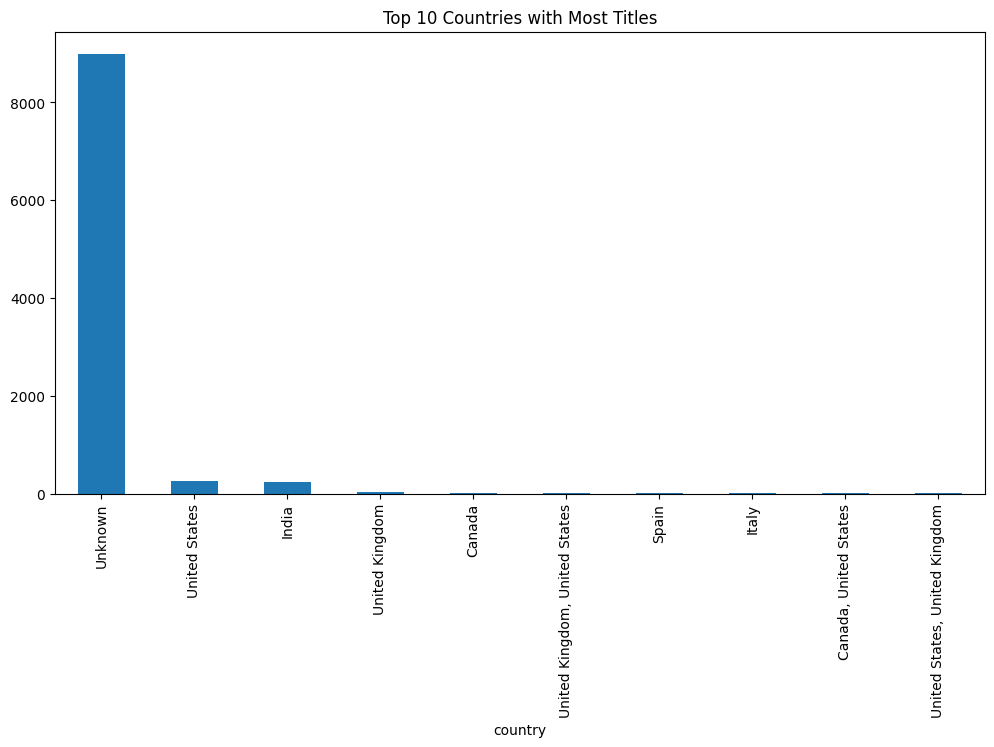

In [ ]:
plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries with Most Titles")
plt.show()

* **Top** **10** **directors**

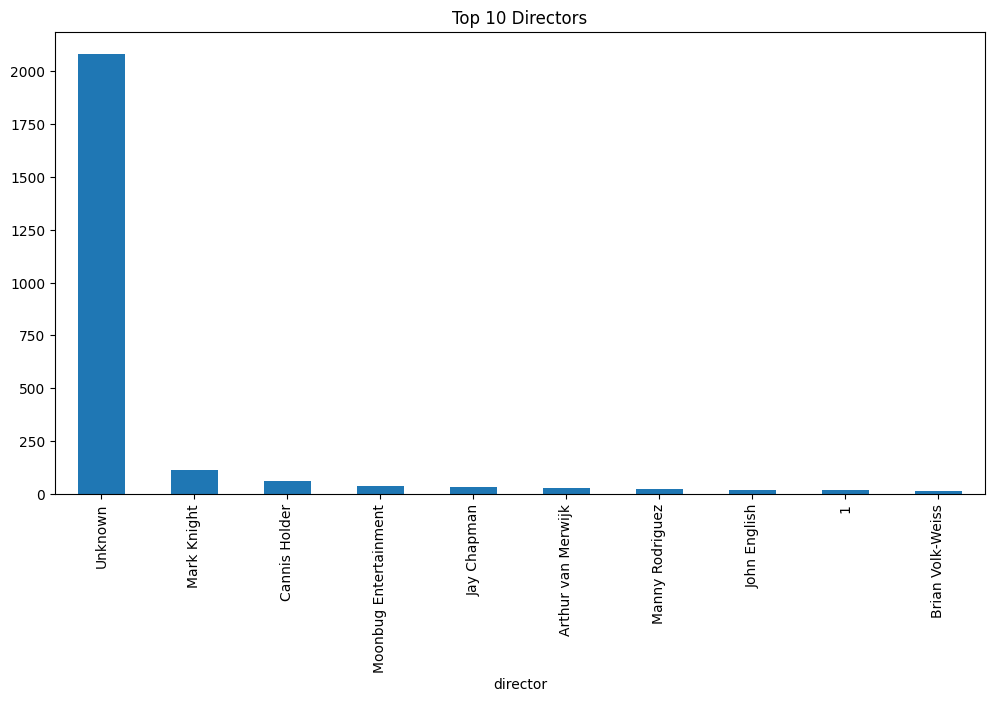

In [ ]:
plt.figure(figsize=(12,6))
df['director'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Directors")
plt.show()

* **Top** **10** **Genres** (**listed_in**).

/tmp/ipython-input-4134997078.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


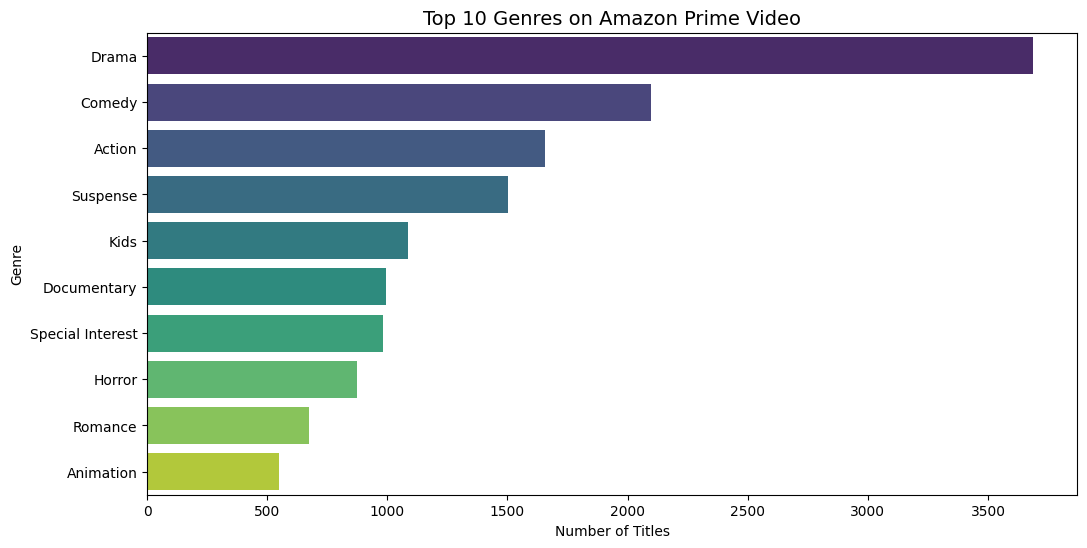

In [ ]:
# Split the 'listed_in' column (genres) and count frequencies
from collections import Counter

# Flatten all genres into a list
all_genres = df['listed_in'].str.split(',').explode().str.strip()

# Count top 10 genres
top_genres = all_genres.value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Amazon Prime Video", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# Saving Cleaned Dataset

In [ ]:
df.to_csv("amazon_prime_titles_cleaned.csv", index=False)